In [2]:
import pandas as pd

df = pd.read_csv('data/rocksamples.csv')

# پارت اول: تماشای داده ها
## اطلاعات کلی

In [3]:
#تماشای داده ها
df.info()
df.head()
df.tail()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


,ID,Weight (g),Pristine (%)
count,2229.000000,2229.000000,2229.000000
mean,52058.432032,168.253024,84.512764
std,26207.651471,637.286458,22.057299
min,10001.000000,0.000000,0.000000
25%,15437.000000,3.000000,80.010000
50%,65527.000000,10.200000,92.300000
75%,72142.000000,93.490000,98.140000
max,79537.000000,11729.000000,180.000000


## ترسیم داده ها
روش های مختلف ترسیم نمودار

<AxesSubplot:xlabel='Mission', ylabel='Weight (g)'>

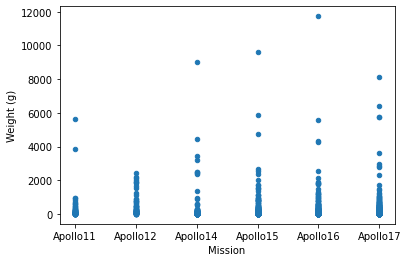

In [4]:
#ترسیم داده ها ۱
df.plot(kind = 'scatter', x = 'Mission', y = 'Weight (g)')


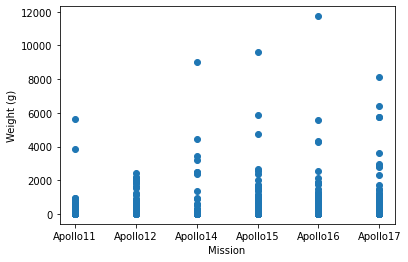

In [5]:
#ترسیم داده ه۲ ۱
import matplotlib.pyplot as plt

fig = plt.subplots()
plt.scatter(df['Mission'], df['Weight (g)'])
plt.xlabel('Mission')
plt.ylabel('Weight (g)')
plt.show()

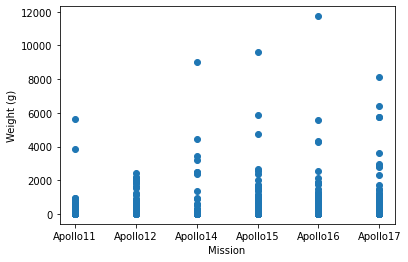

In [6]:
#ترسیم داده ها ۳
fig, ax = plt.subplots()
plt.scatter(df['Mission'], df['Weight (g)'])
ax.set_xlabel('Mission')
ax.set_ylabel('Weight (g)')
plt.show()

# پارت دوم: اصلاح داده ها
شیوه رفتار با داده های تهی

In [7]:
#یه نسخه کپی از دیتافریم
df_m = df.copy()

# ۱.پر کردن سطر ها با مقدار معین جایگزین
mean = df_m['Weight (g)'].mean()
median = df_m['Weight (g)'].median()
mode = df_m['Weight (g)'].mode()[0]
df_m['Weight (g)'].fillna(value = mean, inplace = True) #or you can use median/mode instead of mean

# ۲.حذف سطر های دارای داده های تهی
#(حتی یک سلول تهی)
df_m.dropna(inplace=True)

شیوه رفتار با داده های تکراری

In [8]:
# حذف سطر های تکراری
df_m.drop_duplicates(inplace=True)

## مناسب کردن داده ها



In [9]:
# تبدیل واحد
# تبدیل واحد جرم ها از گرم به کیلوگرم
df_m['Weight (g)'] = df_m['Weight (g)'].apply(lambda x: x/1000)


In [10]:
# اصلاح سرستون های دیتافریم
df_m.rename(columns={'Weight (g)':'Weight (kg)'}, inplace=True)

## برخورد با داده های اشتباه
تشخیص داده های اشتباه

<AxesSubplot:xlabel='Pristine (%)'>

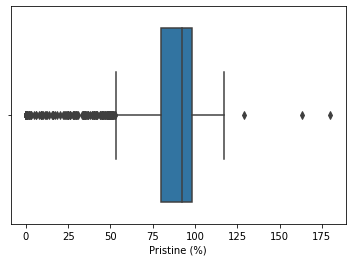

In [11]:
import seaborn as sb
sb.boxplot(x=df_m['Pristine (%)'])

حذف داده های اشتباه

In [12]:

# حذف داده های پرت دیتافریم
#q1_w = df_m['Weight (kg)'].quantile(0.25)
#q3_w = df_m['Weight (kg)'].quantile(0.75)
#iqr_w = q3_w - q1_w
#
#for i in df_m.index:
#    if df_m.loc[i, 'Weight (kg)'] > q3_w+1.5*iqr_w:
#        df_m.drop(i, inplace=True)
#    if df_m.loc[i, 'Weight (kg)'] < q1_w-1.5*iqr_w:
#        df_m.drop(i, inplace=True)



# حذف داده های نادرست دیتافریم
for i in df_m.index:
    if df_m.loc[i, 'Pristine (%)'] > 100:
        df_m.drop(i, inplace=True)



# پارت سوم: تحلیل داده ها
ایجاد یک دیتا فریم تازه برای واریز نتایج تحلیل

In [13]:
# ساخت دیتافریم جدید
missions = pd.DataFrame()

In [14]:
# استخراج داده های یونیک از یک ستون بعنوان گروه داده
missions['Mission'] = df_m['Mission'].unique()
missions

,Mission
0,Apollo11
1,Apollo12
2,Apollo14
3,Apollo15
4,Apollo16
5,Apollo17


In [15]:
# جمع داده های یک ستون با استفاده از گروه داده ها
total_df_weight = df_m.groupby('Mission')['Weight (kg)'].sum()


In [16]:
# ادغام داده های جمع شده با دیتافریم گروه داده ها
missions = pd.merge(missions, total_df_weight, on='Mission')
missions.rename(columns={'Weight (kg)':'Total Weight (kg)'}, inplace=True)
missions

,Mission,Total Weight (kg)
0,Apollo11,21.49408
1,Apollo12,31.82968
2,Apollo14,41.24569
3,Apollo15,74.95400
4,Apollo16,92.46112
5,Apollo17,109.31729


In [17]:
# تفاضل داده ها در یک ستون
missions['Wight Diff'] = missions['Total Weight (kg)'].diff()
missions['Wight Diff'] = missions['Wight Diff'].fillna(value=0)
missions

,Mission,Total Weight (kg),Wight Diff
0,Apollo11,21.49408,0.00000
1,Apollo12,31.82968,10.33560
2,Apollo14,41.24569,9.41601
3,Apollo15,74.95400,33.70831
4,Apollo16,92.46112,17.50712
5,Apollo17,109.31729,16.85617


In [18]:
# افزودن ستون(سری) جدید به دیتافریم
missions['Lunar Module (LM)'] = ['Eagle (LM-5)', 'Interpid (LM-6)', 'Antares (LM-8)', 'Falcon (LM-10)', 'Orion (LM-11)', 'Challenger (LM-12)']
missions['LM mass (kg)'] = [15103, 15235, 15264, 16430, 16445, 16456]
missions['LM mass diff'] = missions['LM mass (kg)'].diff()
missions['LM mass diff'] = missions['LM mass diff'].fillna(value=0)

missions['Command module (CM)'] = ['Columbia (CSM-107)', 'Yankee Clipper (CM-108)', 'Kitty Hawk (CM-110)', 'Endeavor (CM-112)', 'Casper (CM-113)', 'America (CM-114)']
missions['CM mass (kg)'] = [5560, 5609, 5758, 5875, 5840, 5960]
missions['CM mass diff'] = missions['CM mass (kg)'].diff()
missions['CM mass diff'] = missions['CM mass diff'].fillna(value=0)

missions['Total LM + CM mass (kg)'] = missions['LM mass (kg)'] + missions['CM mass (kg)']
missions['Total LM + CM mass diff'] = missions['Total LM + CM mass (kg)'].diff()
missions['Total LM + CM mass diff'] = missions['Total LM + CM mass diff'].fillna(value=0)
missions


,Mission,Total Weight (kg),Wight Diff,Lunar Module (LM),LM mass (kg),LM mass diff,Command module (CM),CM mass (kg),CM mass diff,Total LM + CM mass (kg),Total LM + CM mass diff
0,Apollo11,21.49408,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107),5560,0.0,20663,0.0
1,Apollo12,31.82968,10.33560,Interpid (LM-6),15235,132.0,Yankee Clipper (CM-108),5609,49.0,20844,181.0
2,Apollo14,41.24569,9.41601,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0
3,Apollo15,74.95400,33.70831,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0
4,Apollo16,92.46112,17.50712,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0
5,Apollo17,109.31729,16.85617,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0


In [19]:
# محاسبه نسبت های وزنی - شاخصی برای پیش بینی ها
saturnVPayload = 43500
missions['Crewed area : Payload'] = missions['Total LM + CM mass (kg)'] / saturnVPayload
missions['Sample : Crewed area'] = missions['Total Weight (kg)'] / missions['Total LM + CM mass (kg)']
missions['Sample : Payload'] = missions['Total Weight (kg)'] / saturnVPayload
missions

,Mission,Total Weight (kg),Wight Diff,Lunar Module (LM),LM mass (kg),LM mass diff,Command module (CM),CM mass (kg),CM mass diff,Total LM + CM mass (kg),Total LM + CM mass diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.49408,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107),5560,0.0,20663,0.0,0.475011,0.001040,0.000494
1,Apollo12,31.82968,10.33560,Interpid (LM-6),15235,132.0,Yankee Clipper (CM-108),5609,49.0,20844,181.0,0.479172,0.001527,0.000732
2,Apollo14,41.24569,9.41601,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001962,0.000948
3,Apollo15,74.95400,33.70831,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003360,0.001723
4,Apollo16,92.46112,17.50712,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149,0.002126
5,Apollo17,109.31729,16.85617,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004877,0.002513


In [20]:
# محاسبه میانگین نسبت ها - بعنوان یک شاخص متعادل
CrewedArea_Payload_Ratio = missions['Crewed area : Payload'].mean()
Sample_CrewedArea_Ratio = missions['Sample : Crewed area'].mean()
Sample_Payload_Ratio = missions['Sample : Payload'].mean()

print('Crewed area : Payload = ', CrewedArea_Payload_Ratio)
print('Sample : Crewed area = ', Sample_CrewedArea_Ratio)
print('Sample : Payload = ', Sample_Payload_Ratio)

Crewed area : Payload =  0.4963026819923371
Sample : Crewed area =  0.002819247186872154
Sample : Payload =  0.001422612490421456


# پارت چهارم: تفسیر و پیش بینی
ایجاد دیتافریم جدید برای ثبت نتایج پیش بینی

In [21]:
artemis_missions = pd.DataFrame({'Mission' : ['artemis1','artemis1b','artemis2'], 'Payload (kg)' : [26988, 37965, 42955]})
artemis_missions['Total Weight (kg)'] = artemis_missions['Payload (kg)']* CrewedArea_Payload_Ratio
artemis_missions


,Mission,Payload (kg),Total Weight (kg)
0,artemis1,26988,13394.216782
1,artemis1b,37965,18842.131322
2,artemis2,42955,21318.681705


In [22]:
artemis_missions['Sample Weight from total (kg)'] = artemis_missions['Total Weight (kg)'] * Sample_CrewedArea_Ratio
artemis_missions['Sample Weight from payload (kg)'] = artemis_missions['Payload (kg)'] * Sample_Payload_Ratio
artemis_missions

,Mission,Payload (kg),Total Weight (kg),Sample Weight from total (kg),Sample Weight from payload (kg)
0,artemis1,26988,13394.216782,37.761608,38.393466
1,artemis1b,37965,18842.131322,53.120626,54.009483
2,artemis2,42955,21318.681705,60.102633,61.108320


پیش بینی وزن نمونه برداری بصورت میانگین نتایج تفسیر

In [23]:
artemis_missions['Estimated Sample Weight (kg)'] = (artemis_missions['Sample Weight from total (kg)'] + artemis_missions['Sample Weight from payload (kg)'])/2
artemis_missions

,Mission,Payload (kg),Total Weight (kg),Sample Weight from total (kg),Sample Weight from payload (kg),Estimated Sample Weight (kg)
0,artemis1,26988,13394.216782,37.761608,38.393466,38.077537
1,artemis1b,37965,18842.131322,53.120626,54.009483,53.565054
2,artemis2,42955,21318.681705,60.102633,61.108320,60.605476


تفسیر اولویت نمونه برداری

In [24]:
df_m['Remaining (kg)'] = df_m['Weight (kg)']*df_m['Pristine (%)']/100
df_m.describe()


,ID,Weight (kg),Pristine (%),Remaining (kg)
count,2208.000000,2208.000000,2208.000000,2208.000000
mean,52295.559783,0.168162,84.313465,0.137689
std,26118.027174,0.638858,21.833291,0.526621
min,10001.000000,0.000000,0.000000,0.000000
25%,15467.750000,0.003027,80.000000,0.002450
50%,65538.500000,0.010215,92.150000,0.008565
75%,72151.250000,0.093423,98.042500,0.077061
max,79537.000000,11.729000,100.000000,11.169527


In [25]:
# نمونه های دارای اولویت
df_critical = df_m.loc[(df_m['Weight (kg)'] <= df_m['Weight (kg)'].mean()) & (df_m['Remaining (kg)'] <= df_m['Remaining (kg)'].mean())]
df_critical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1773 non-null   int64  
 1   Mission         1773 non-null   object 
 2   Type            1773 non-null   object 
 3   Subtype         1773 non-null   object 
 4   Weight (kg)     1773 non-null   float64
 5   Pristine (%)    1773 non-null   float64
 6   Remaining (kg)  1773 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 110.8+ KB


In [26]:
# وزن نمونه های دارای اولویت
df_critical.groupby('Type')['Weight (kg)'].sum()

Type
Basalt      4.75262
Breccia    12.47271
Core        1.03927
Crustal     0.48060
Soil       17.81696
Special     0.00300
Name: Weight (kg), dtype: float64

In [27]:
# براساس وزن قابل حمل، تمامی نمونه های دارای الویت امکان حمل را دارند
df_needed = df_critical

# اگر وزن نمونه های دارای اولویت بیشتر از وزن قابل حمل توسط آرتمیس باشد:
# critical_typs = ['basalt', 'breccia']
# برای مثال میتوان از نوع نمونه ها برای اولویت بندی استفاده کرد.
# df_needed = df_critical.loc[df_critical['Type'].isin[critical_types]]

In [35]:
# گزارش پیش بینی وزن و نوع نمونه های دارای اولویت
df_needed_overview = pd.DataFrame()
df_needed_overview['Type'] = df_needed.Type.unique()
df_needed_weight = df_needed.groupby('Type')['Weight (kg)'].sum().reset_index()
df_needed_overview = pd.merge(df_needed_overview, df_needed_weight, on='Type')
df_needed_overview

,Type,Weight (kg)
0,Soil,17.81696
1,Core,1.03927
2,Breccia,12.47271
3,Basalt,4.75262
4,Crustal,0.48060
5,Special,0.00300
